## Analisi distribuzione classi della cartella Spettrogrammi per riduzione della dimensionalità dei dati

In [13]:
import numpy as np
import utils 
import pandas as pd
import os
import matplotlib.pyplot as plt

In [40]:
df_pathsTarget, df_namesTarget = utils.create_dataframe_from_files('Spettrogrammi/Target')
df_pathsNonTarget, df_namesNonTarget = utils.create_dataframe_from_files('Spettrogrammi/Non-Target')

import os

# Carica il DataFrame da df_paths.csv
# df_paths = pd.read_csv('Dataset/df_paths.csv', header=None, names=['path'])

# Crea una copia del DataFrame originale
df_pathsTargetCopy = df_pathsTarget.copy()
df_pathsNonTargetCopy = df_pathsNonTarget.copy()

# Estrai la classe e il target dai percorsi dei file
df_pathsTargetCopy['class'] = df_pathsTargetCopy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_pathsTargetCopy['target'] = df_pathsTargetCopy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

df_pathsNonTargetCopy['class'] = df_pathsNonTargetCopy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_pathsNonTargetCopy['target'] = df_pathsNonTargetCopy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))

# Target

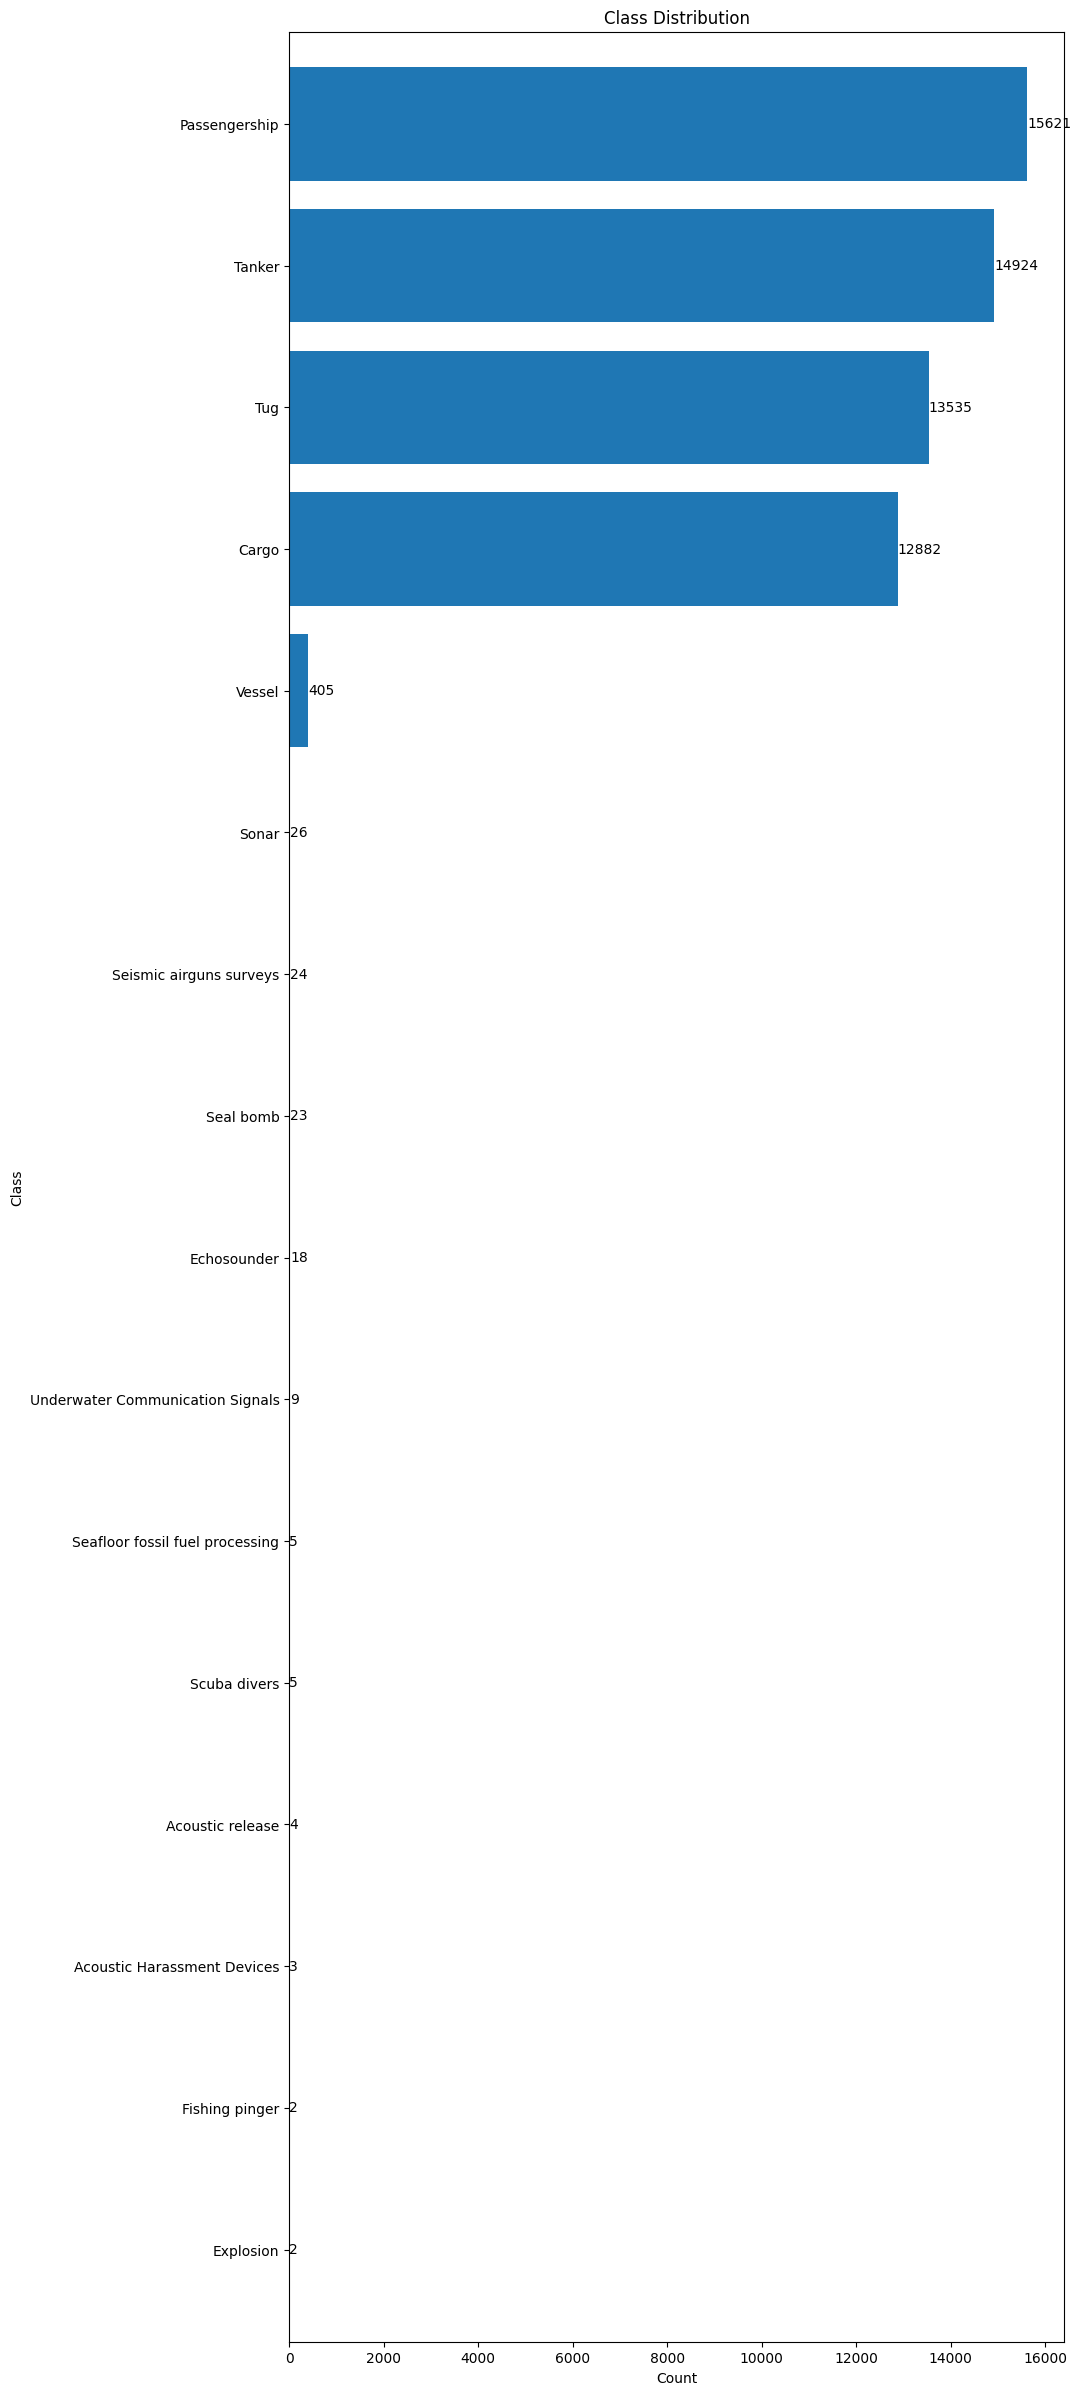

In [90]:
utils.plot_class_distribution_horizontal(df_pathsTargetCopy, 'class')

# Non Target

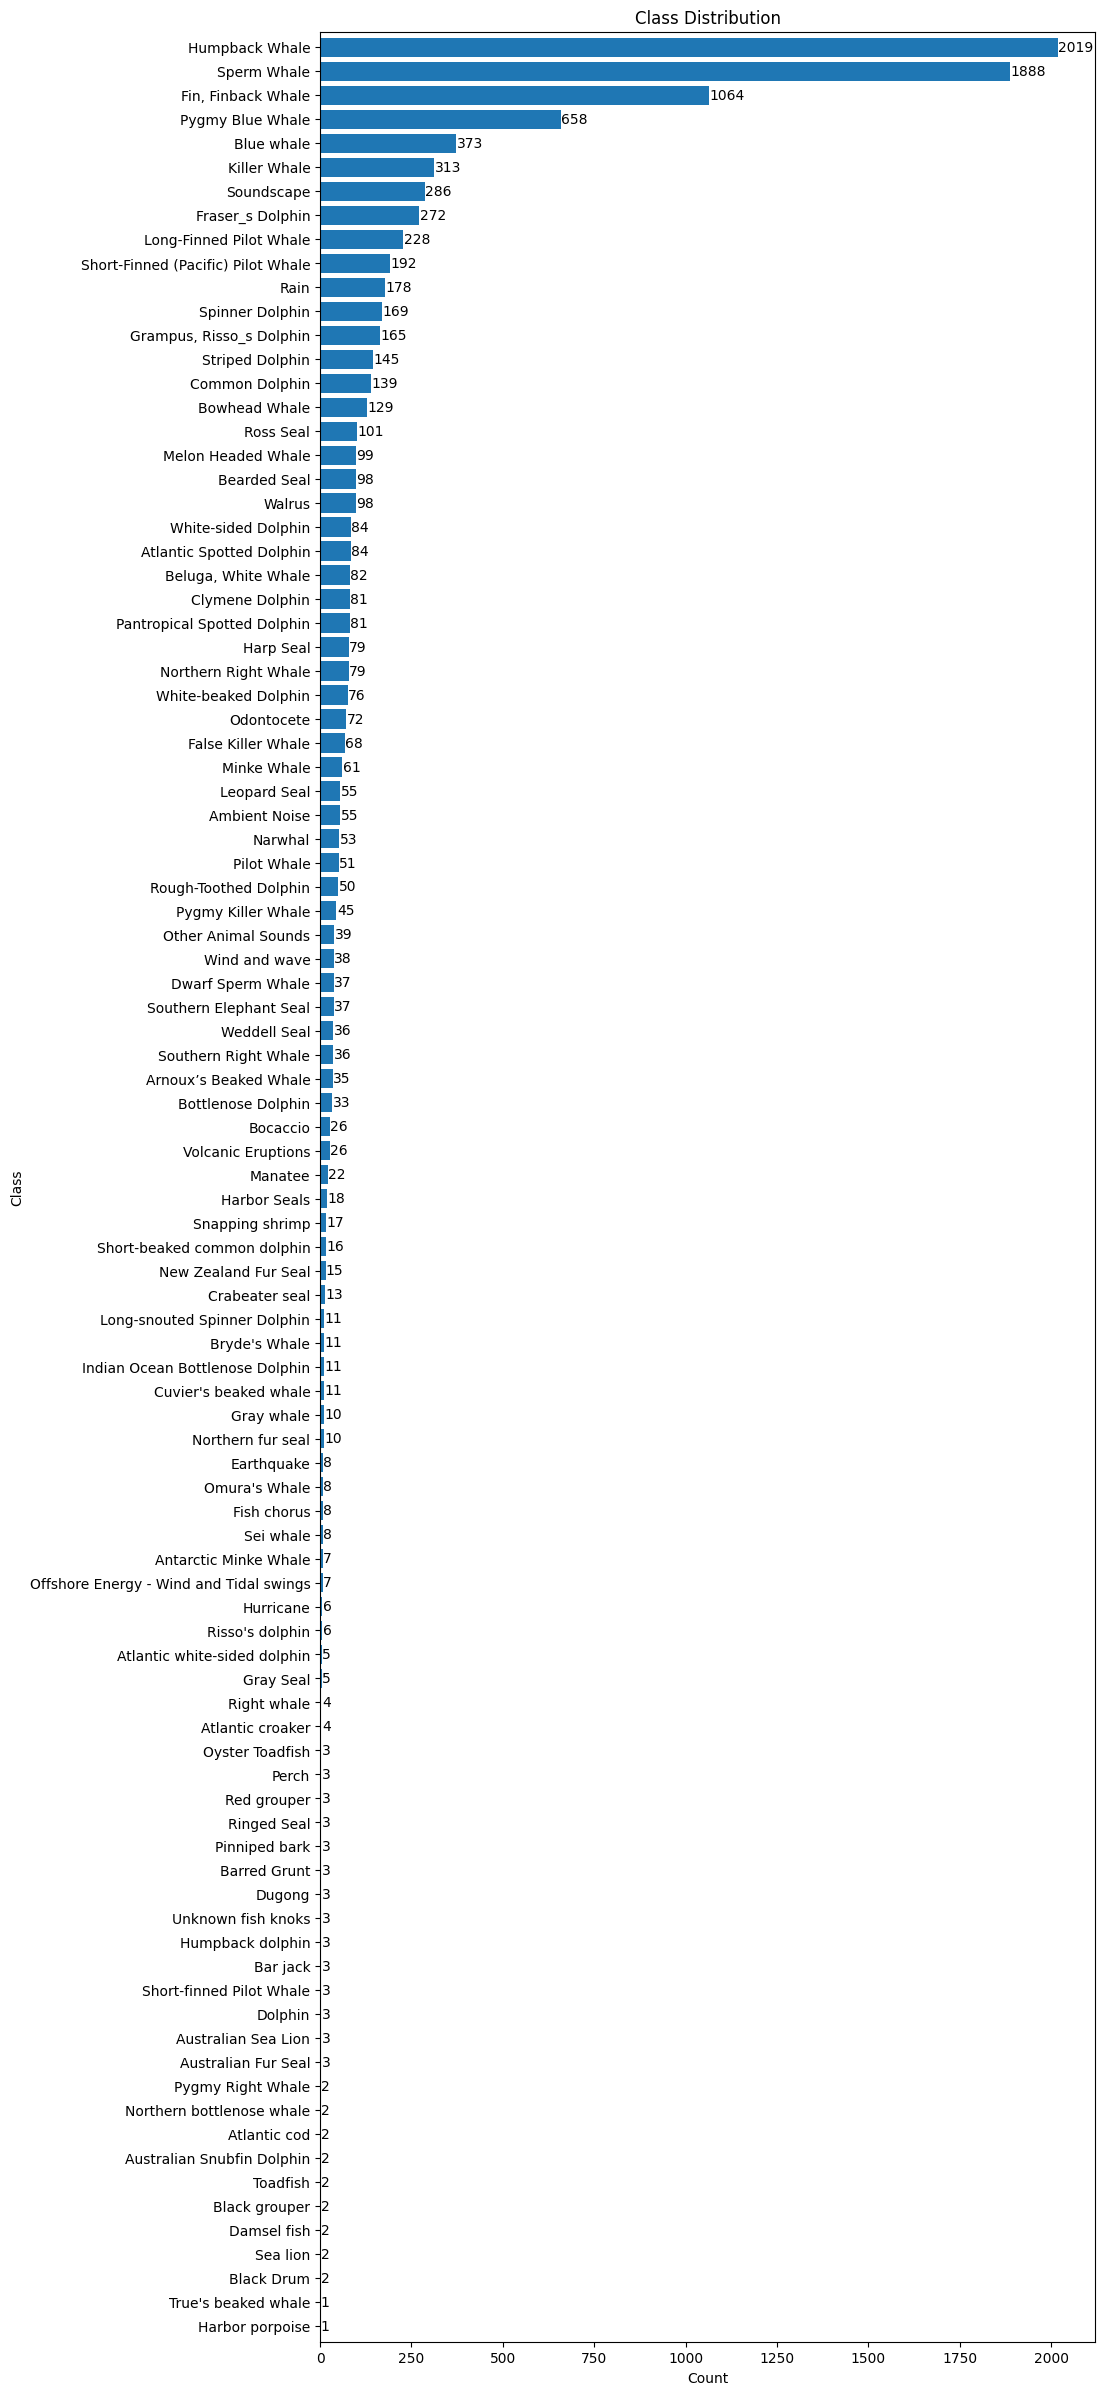

In [91]:
utils.plot_class_distribution_horizontal(df_pathsNonTargetCopy, 'class')


## Eliminati dal csv i path relativi a cartelle con meno di 5 file

In [32]:
def filter_csv_by_file_count(csv_path, k, output_csv_path):
    df = pd.read_csv(csv_path, header=None, names=['FilePath'])

    df['Subfolder'] = df['FilePath'].apply(lambda path: os.path.dirname(path))
    grouped_df = df.groupby('Subfolder').size().reset_index(name='Count')

    filtered_grouped_df = grouped_df[grouped_df['Count'] >= k]

    filtered_df = pd.merge(df, filtered_grouped_df, how='inner', on='Subfolder')

    filtered_df = filtered_df.drop(columns=['Count', 'Subfolder'])

    filtered_df.to_csv(output_csv_path, index=False, header=False)

filter_csv_by_file_count('Spettrogrammi/Target/df_paths.csv', 8, 'Spettrogrammi/Target/df_paths_filtered.csv')

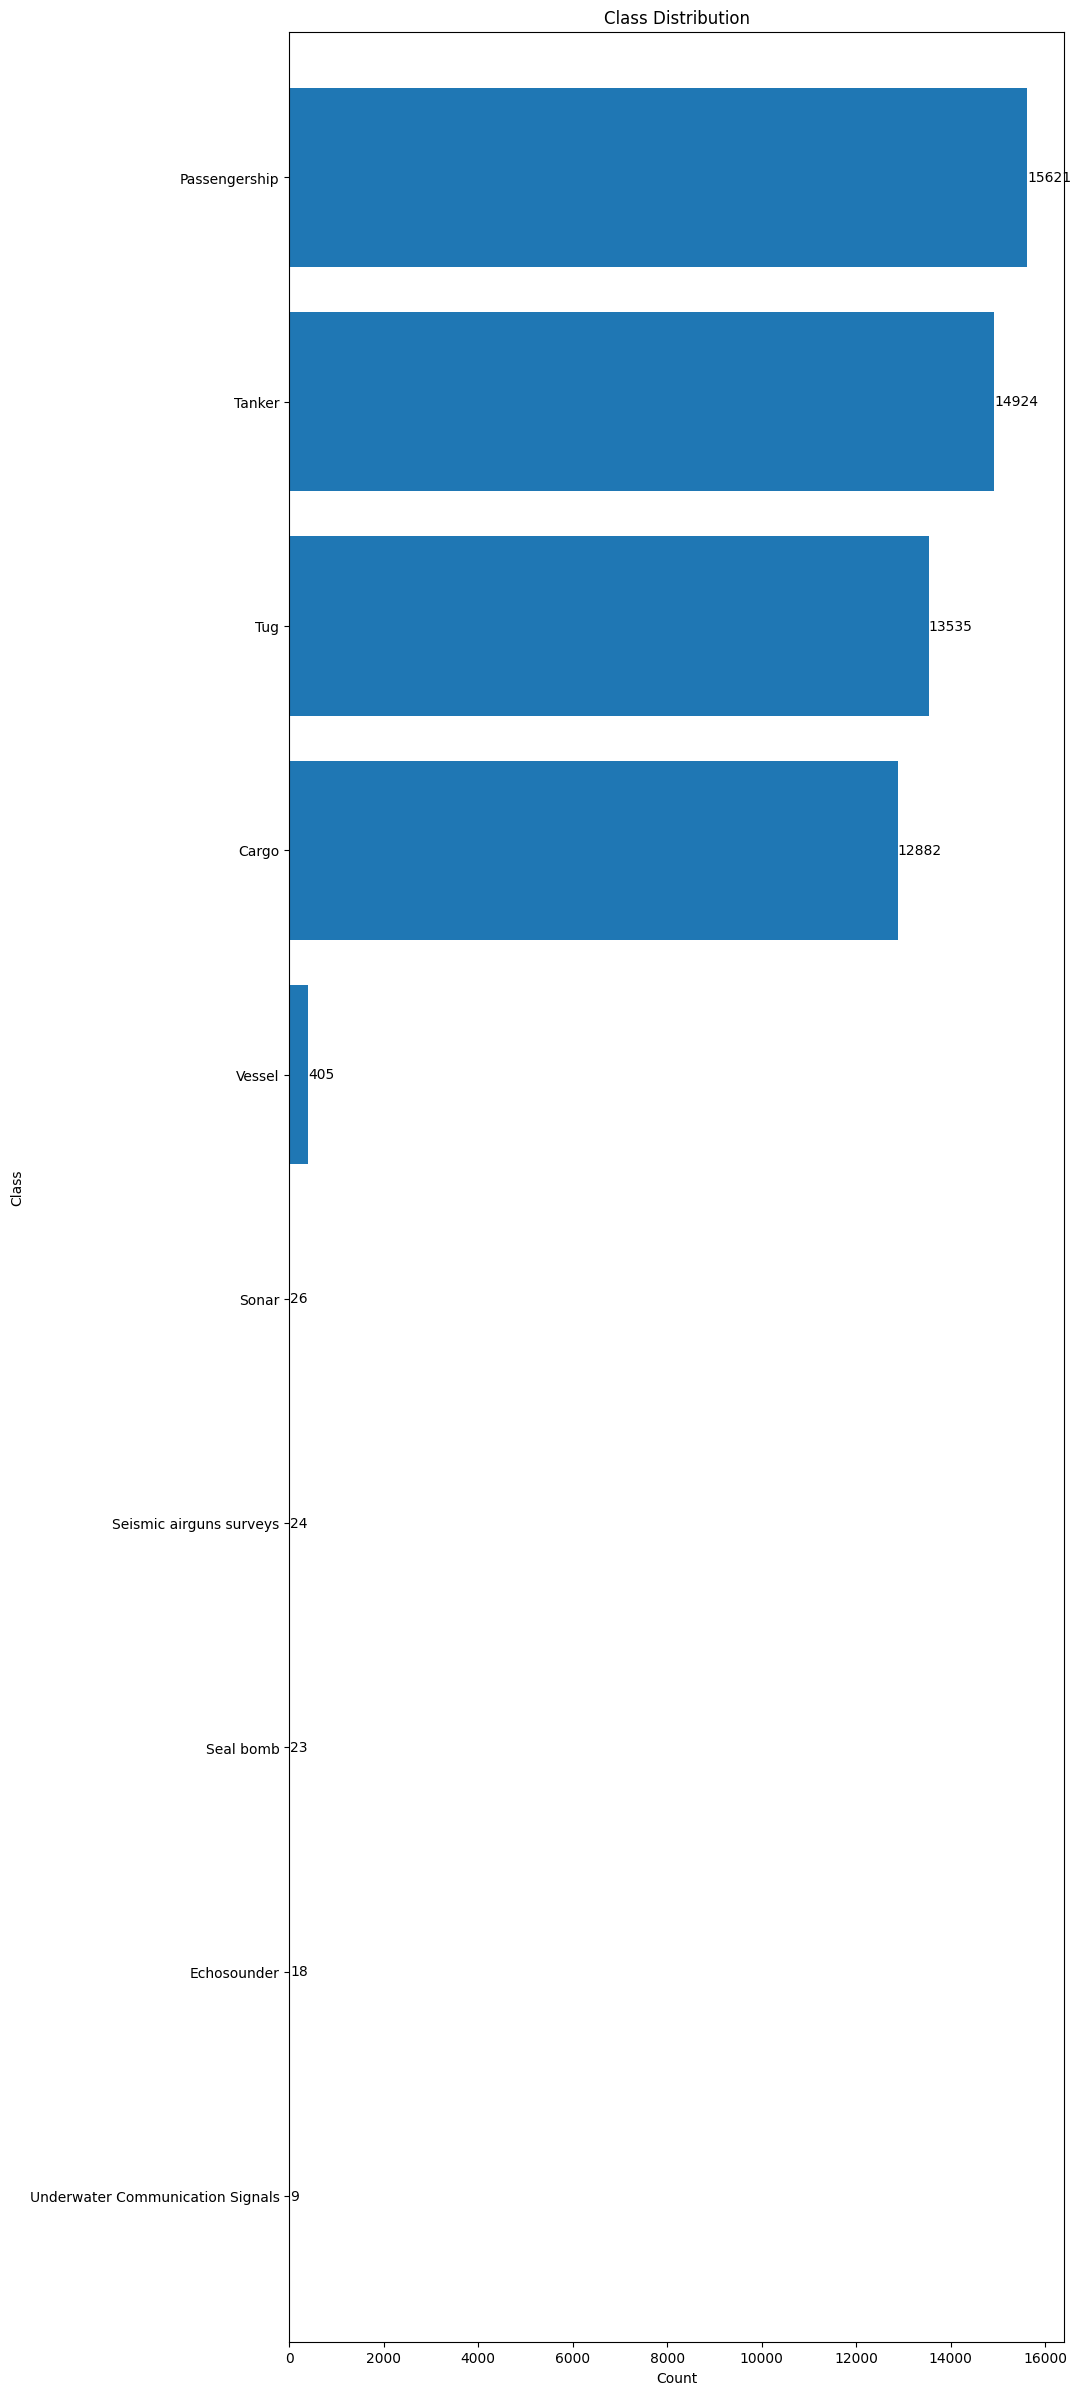

In [33]:
df_filtered = pd.read_csv('Spettrogrammi/Target/df_paths_filtered.csv', header=None, names=['FilePath'])
df_filtered_copy = df_filtered.copy()

df_filtered_copy['class'] = df_filtered_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_filtered_copy['target'] = df_filtered_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))
utils.plot_class_distribution_horizontal(df_filtered_copy, 'class')


In [18]:
filter_csv_by_file_count('Spettrogrammi/Non-Target/df_paths.csv', 8, 'Spettrogrammi/Non-Target/df_paths_filtered.csv')

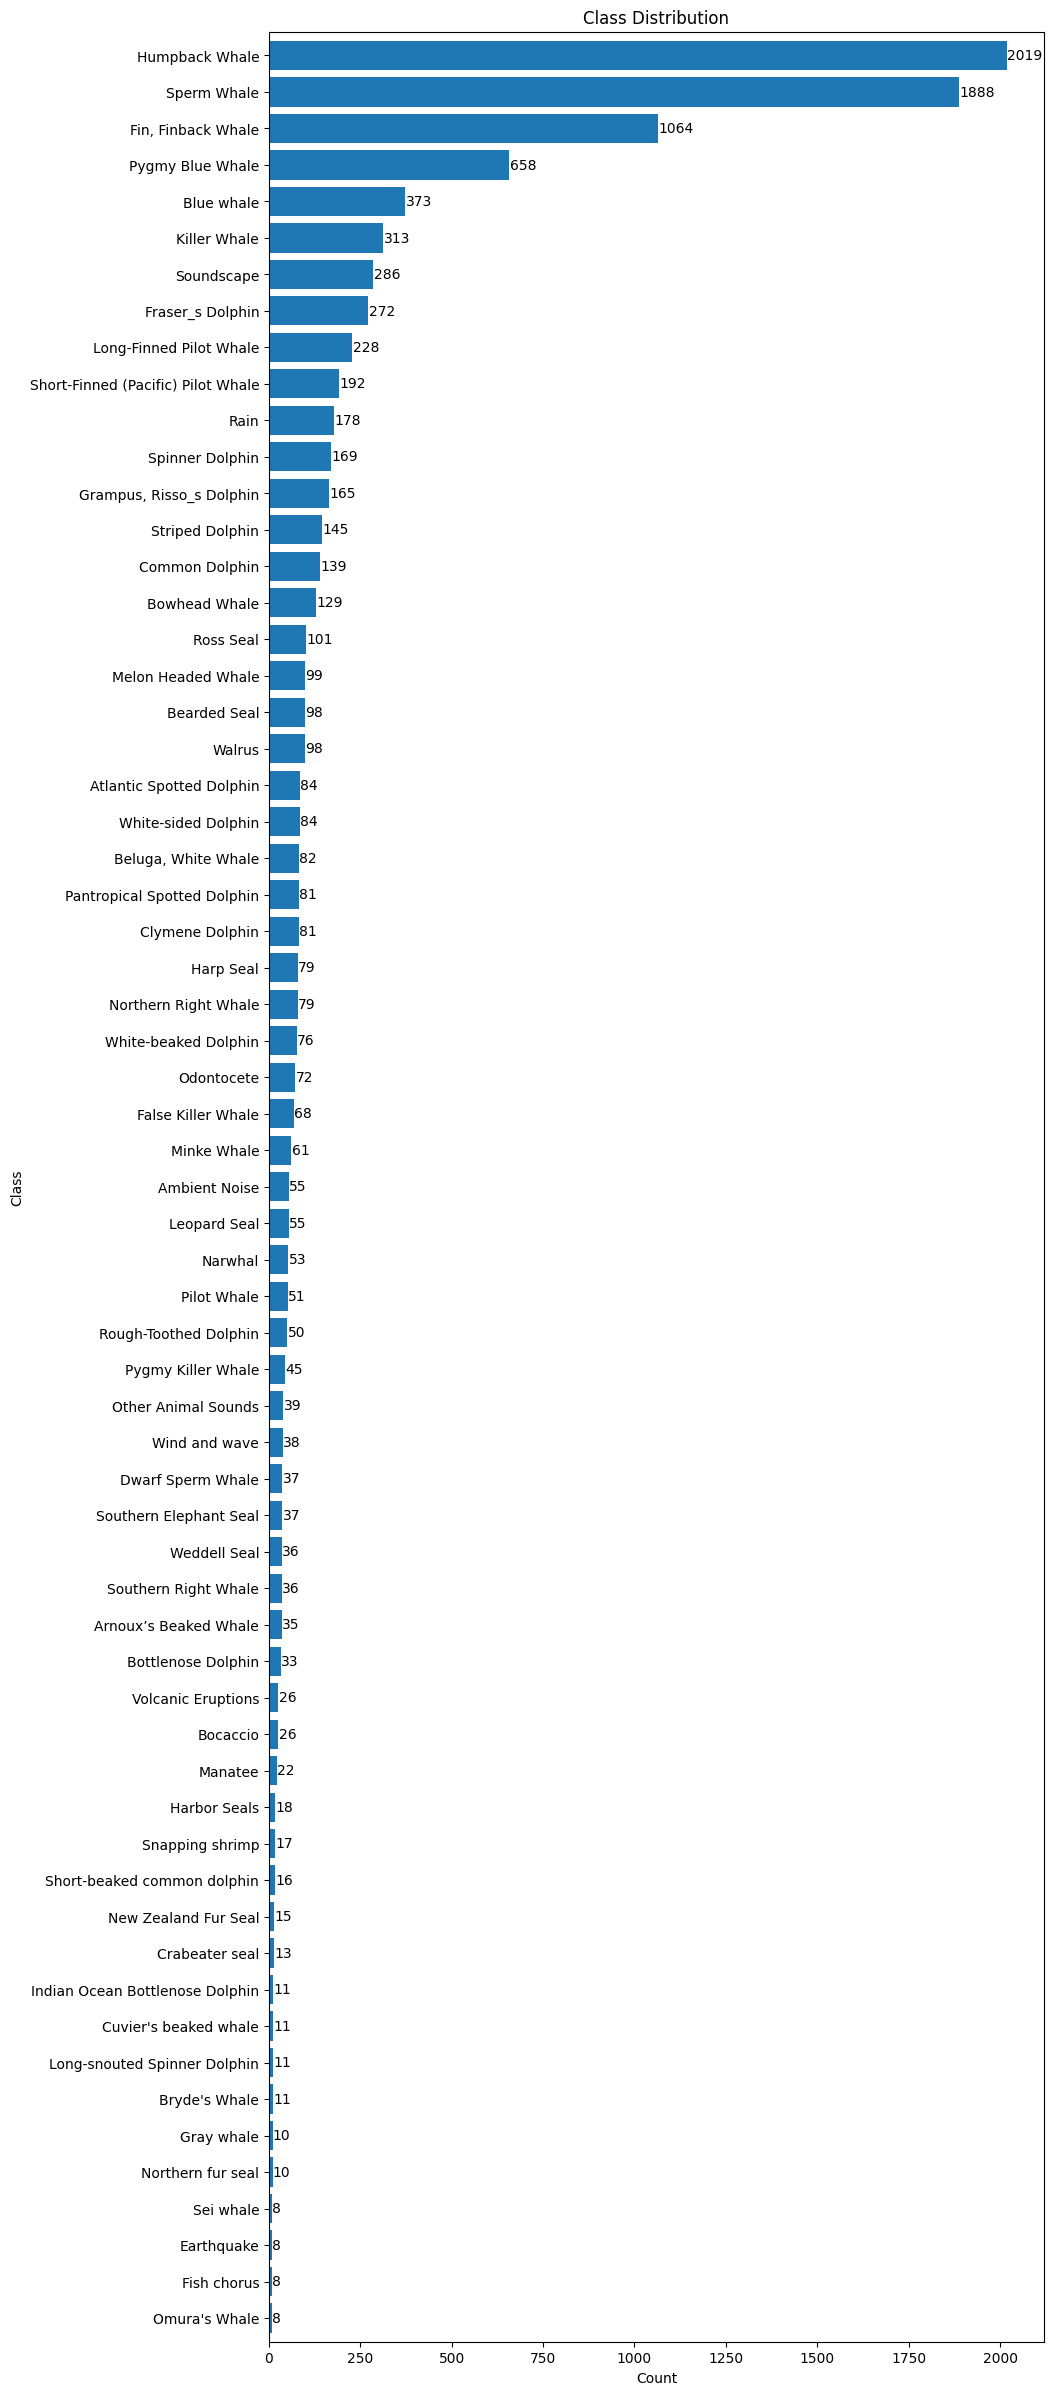

In [19]:
df_filtered = pd.read_csv('Spettrogrammi/Non-Target/df_paths_filtered.csv', header=None, names=['FilePath'])
df_filtered_copy = df_filtered.copy()

df_filtered_copy['class'] = df_filtered_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(path)))
df_filtered_copy['target'] = df_filtered_copy['FilePath'].apply(lambda path: os.path.basename(os.path.dirname(os.path.dirname(path))))
utils.plot_class_distribution_horizontal(df_filtered_copy, 'class')

In [ ]:
def create_csv_for_folders(directory, k):
    # Crea la cartella 'dati ssim ssim' se non esiste
    data_dir = os.path.join(directory, 'dati ssim')
    os.makedirs(data_dir, exist_ok=True)

    # Scorri tutte le cartelle e i file all'interno del percorso fornito
    for root, dirs, files in os.walk(directory):
        # Filtra solo i file PNG
        png_files = [file for file in files if file.endswith('.png')]
        # Se la cartella ha meno di k file PNG, salta questa cartella
        if len(png_files) < k:
            continue
        # Crea un DataFrame con i percorsi dei file PNG
        df = pd.DataFrame([os.path.join(root, file) for file in png_files], columns=['FilePath'])
        # Salva il DataFrame come un file CSV nella cartella 'dati ssim ssim'
        folder_name = os.path.basename(root)
        df.to_csv(os.path.join(data_dir, f'df_paths_{folder_name}.csv'), index=False)


In [ ]:
create_csv_for_folders('Spettrogrammi/Target/', 8)

In [ ]:
create_csv_for_folders('Spettrogrammi/Non-Target/', 8)

In [116]:
def merge_csv_files(directory, output_file):
    # Ottieni tutti i file nella directory
    files = os.listdir(directory)

    # Filtra solo i file CSV
    csv_files = [file for file in files if file.endswith('.csv')]

    # Crea una lista per contenere i DataFrame
    df_list = []

    # Leggi ogni file CSV e aggiungilo alla lista di DataFrame
    for csv_file in csv_files:
        df = pd.read_csv(os.path.join(directory, csv_file))
        df_list.append(df)

    # Unisci tutti i DataFrame in un unico DataFrame
    merged_df = pd.concat(df_list, ignore_index=True)

    # Esporta il DataFrame unificato in un nuovo file CSV
    merged_df.to_csv(output_file, index=False)

In [180]:
merge_csv_files('Spettrogrammi/Target/dati ssim/SSIM', 'Spettrogrammi/Target/ssim_results.csv')

In [181]:
merge_csv_files('Spettrogrammi/Non-Target/dati ssim/SSIM', 'Spettrogrammi/Non-Target/ssim_results.csv')

In [182]:
df_non_target = pd.read_csv('Spettrogrammi/Non-Target/ssim_results.csv')
pd.set_option('display.float_format', '{:.3f}'.format)
df_non_target.describe()

,SSIM
count,675576.000
mean,0.903
std,0.048
min,0.386
25%,0.889
50%,0.915
75%,0.932
max,0.981


In [183]:
df_target = pd.read_csv('Spettrogrammi/Target/ssim_results.csv')
pd.set_option('display.float_format', '{:.3f}'.format)
df_target.describe()

,SSIM
count,4538823.000
mean,0.928
std,0.033
min,0.378
25%,0.919
50%,0.936
75%,0.948
max,0.969


## Eliminazione delle immagini con SSIM > 0.95
Le immagini con SSIM > 0.95 verranno eliminate solo dalle classi con più di 500 immagini. Questo per evitare di eliminare troppi dati dalle classi con meno immagini.

Per cercare di eliminare più campioni simili, si è deciso di verificare il numero di occorrenze di ogni path all'interno di ssim_results.csv, prendendo in esame solo la prima colonna (Image1). Questo ci permette di capire quante immagini sono simili tra loro e di conseguenza eliminare più campioni simili.

In [184]:
def filter_and_count(csv_path):
    # Carica il DataFrame dal file csv
    df = pd.read_csv(csv_path)

    # Filtra le righe con SSIM >= 0.95
    filtered_df = df[df['SSIM'] >= 0.95]

    # Conta il numero di occorrenze per 'Image1'
    count_df = filtered_df['Image1'].value_counts().reset_index()

    # Rinomina le colonne
    count_df.columns = ['Image1', 'Count']

    # Ordina il DataFrame in base al conteggio in modo decrescente
    sorted_df = count_df.sort_values(by='Count', ascending=False)
    
    # Se il DataFrame è vuoto, restituisci None
    if sorted_df.empty:
        return None

    # Altrimenti, restituisci il percorso del primo elemento
    return sorted_df.iloc[0]['Image1']

In [185]:
def get_image2_paths(ssim_csv_path, image1_path):
    # Load the DataFrame from the CSV file
    df = pd.read_csv(ssim_csv_path)

    # Filter the DataFrame to only include rows where 'Image1' is equal to image1_path
    similar_images_df = df[df['Image1'] == image1_path]

    # Return the 'Image2' values of these rows as a list
    similar_images_list = similar_images_df['Image2'].tolist()

    return similar_images_list

In [194]:
def remove_similar_images(ssim_csv_path, df_paths_csv_path, class_column):
    while True:
        isGood = False
        
        # Ottieni il percorso dell'immagine con il maggior numero di occorrenze in ssim_results.csv con SSIM >= 0.95
        # image1_path = filter_and_count(ssim_csv_path)
        # print(class_column[class_column == True].index.tolist())
        image1_path = filter_and_count(ssim_csv_path)
        list_image2 = get_image2_paths(ssim_csv_path, image1_path)
        # print(image1_path)
                
        ssim_df = pd.read_csv(ssim_csv_path)
        # Rimuovi le righe da ssim_results.csv
        ssim_df = ssim_df[ssim_df['Image1'] != image1_path]

        # Salva i DataFrame modificati
        ssim_df.to_csv(ssim_csv_path, index=False)
        
        # Se filter_and_count restituisce None
        if image1_path is None:
            break
        
        path_parts = image1_path.split('/')
        if path_parts[2] in class_column:
            isGood = True
            
        if isGood:
            df_paths = pd.read_csv(df_paths_csv_path)
    
            # Trova tutte le righe in ssim_results.csv dove Image1 è uguale a image1_path
            # similar_images = ssim_df[ssim_df['Image1'] == image1_path]
            # print(f"similar_images: {similar_images}")
    
            # Per ogni riga trovata, rimuovi la riga corrispondente da df_paths.csv
            # for _, row in similar_images.iterrows():
            #     
            #     image2_path = row['Image2']
            #     print(f"image2path: {image2_path}")
            #     df_paths = df_paths[df_paths['FilePath'] != image2_path]
            # 
            # df_paths.to_csv(df_paths_csv_path, index=False)
            
            for path in list_image2:
                # print("dentro for")
                df_paths = df_paths[df_paths['FilePath'] != path]
                
            df_paths.to_csv(df_paths_csv_path, index=False)
            
        else:
            continue

In [187]:
df_non_target = pd.read_csv('Spettrogrammi/Non-Target/df_paths.csv')
df_target = pd.read_csv('Spettrogrammi/Target/df_paths.csv')

df_non_target.to_csv('final_dataset/df_paths_non_target.csv', index=False)
df_target.to_csv('final_dataset/df_paths_target.csv', index=False)

In [188]:
def get_class_distribution(df, class_column):
    class_distribution = df[class_column].value_counts() > 500
    class_distribution = class_distribution.sort_values(ascending=True)
    return class_distribution

In [189]:
non_target_distribution = get_class_distribution(df_pathsNonTargetCopy, 'class')
target_distribution = get_class_distribution(df_pathsTargetCopy, 'class')

In [190]:
non_target_distribution[non_target_distribution == True].index.tolist()

['Pygmy Blue Whale', 'Fin, Finback Whale', 'Sperm Whale', 'Humpback Whale']

In [191]:
target_distribution[target_distribution == True].index.tolist()

['Passengership', 'Tanker', 'Tug', 'Cargo']

Rimozione da ssim_results.csv delle righe appartenti alle classi con meno di 500 immagini

In [192]:
def remove_rows_by_class(ssim_csv_path, class_column):
    ssim_df = pd.read_csv(ssim_csv_path)
    
    # Create a new column 'class' in the DataFrame by extracting the class from 'Image1'
    ssim_df['class'] = ssim_df['Image1'].apply(lambda x: x.split('/')[2])
    
    # Create a condition that checks if 'class' is in 'class_column'
    condition = ssim_df['class'].isin(class_column)
    
    # Use the condition to filter the DataFrame
    filtered_df = ssim_df[condition]
    
    # Save the filtered DataFrame to the original file
    filtered_df.to_csv(ssim_csv_path, index=False)

In [193]:
remove_rows_by_class('Spettrogrammi/Target/ssim_results.csv', target_distribution[target_distribution == True].index.tolist())
remove_rows_by_class('Spettrogrammi/Non-Target/ssim_results.csv', non_target_distribution[non_target_distribution == True].index.tolist())

In [195]:
remove_similar_images('Spettrogrammi/Non-Target/ssim_results.csv', 'final_dataset/df_paths_non_target.csv',non_target_distribution[non_target_distribution == True].index.tolist())

In [196]:
remove_similar_images('Spettrogrammi/Target/ssim_results.csv', 'final_dataset/df_paths_target.csv', target_distribution[target_distribution == True].index.tolist())

KeyboardInterrupt: 

In [ ]:
# TODO: Split del dataset in train, validation e test (da fare sui csv nuovi)

In [ ]:
# TODO: Data augmentation sul dataset di train, iniziando con il flip delle immagini